EXPLANATORY DATA ANALYSIS

In [ ]:
import pandas as pd


# Load the dataset
df = pd.read_csv(r'C:\Users\JEAN JEASEN\Documents\Codveda\level_1\cleaned_sentiment_dataset.csv')

# Basic info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())
print("Missing values:\n", df.isnull().sum())

# Describe numerical columns
print(df.describe())


Shape: (731, 15)
Columns: ['No', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour', 'Platform_LE']
   No                                               Text    Sentiment  \
0   1   Traffic was terrible this morning.           ...   Negative     
1   2   Just finished an amazing workout! 💪          ...   Positive     
2   3   Excited about the upcoming weekend getaway!  ...   Positive     
3   4   Trying out a new recipe for dinner tonight.  ...   Neutral      
4   5   Feeling grateful for the little things in lif...   Positive     

             Timestamp            User   Platform  \
0  2023-01-15 08:45:00   CommuterX        Twitter   
1  2023-01-15 15:45:00   FitnessFan     Instagram   
2  2023-01-15 18:20:00   AdventureX      Facebook   
3  2023-01-15 19:55:00   ChefCook       Instagram   
4  2023-01-16 09:10:00   GratitudeNow     Twitter   

                                     Hashtags  Retweets     Like

In [10]:
df.groupby(by="Country").agg({
    "No" : "unique",
    "Text":"unique",
    "Sentiment":"unique",
    "Timestamp":"unique",
    "User":"unique",
    "Platform":"unique",
    "Hashtags":"unique",
    "Retweets":["min","max","mean"],
    "Likes":["min","max","mean"],
    "Year":["min","max","mean"],
})

No  \
                                                                unique   
Country                                                                  
 Australia           [4, 9, 27, 47, 87, 100, 118, 124, 131, 143, 14...   
 Australia                                                    [58, 82]   
 Australia                                    [63, 113, 153, 159, 434]   
 Australia           [74, 92, 172, 180, 185, 205, 213, 218, 222, 22...   
 Australia                                   [167, 191, 200, 209, 232]   
...                                                                ...   
 USA                 [53, 65, 77, 89, 101, 163, 168, 176, 181, 187,...   
 USA                                                             [192]   
 USA                                              [376, 396, 413, 420]   
 USA                     [332, 337, 342, 347, 352, 356, 359, 364, 368]   
USA                              [10, 18, 21, 33, 39, 62, 68, 86, 128]   

                                                                  Text  \
                                                                unique   
Country                                                                  
 Australia           [ Trying out a new recipe for dinner tonight. ...   
 Australia           [ Sharing love and positive vibes with everyon...   
 Australia           [ Experiencing awe at the breathtaking sunset....   
 Australia           [ Pride in achieving a personal milestone.    ...   
 Australia           [ Resentment building up over past betrayals. ...   
...                                                                ...   
 USA                 [ Feeling a sense of fear after watching a thr...   
 USA                 [ Jealousy poisons my thoughts, resentment bre...   
 USA                 [Whimsical delight in a world of fairy tales a...   
 USA                 [Awe-struck by the breathtaking sunrise over t...   
USA                  [ Just published a new blog post. Check it out...   

                                                             Sentiment  \
                                                                unique   
Country                                                                  
 Australia           [ Neutral   ,  Positive  ,  Awe          ,  Ac...   
 Australia                                            [ Love         ]   
 Australia           [ Awe          ,  Gratitude     ,  Enthusiasm ...   
 Australia           [ Pride        ,  Anticipation ,  Helplessness...   
 Australia           [ Resentment      ,  Loneliness ,  Melancholy ...   
...                                                                ...   
 USA                 [ Fear         ,  Surprise     ,  Excitement  ...   
 USA                                                   [ Jealousy    ]   
 USA                 [ Whimsy        ,  Resilience   ,  Heartbreak ...   
 USA                 [ Awe           ,  Overwhelmed   ,  Admiration...   
USA                  [ Positive  ,  Neutral   ,  Affection    ,  An...   

                                                             Timestamp  \
                                                                unique   
Country                                                                  
 Australia           [2023-01-15 19:55:00, 2023-01-17 12:20:00, 202...   
 Australia                  [2023-02-14 08:30:00, 2023-02-23 08:30:00]   
 Australia           [2023-02-15 20:30:00, 2012-11-25 10:00:00, 201...   
 Australia           [2023-02-19 16:00:00, 2023-02-26 07:30:00, 202...   
 Australia           [2018-05-22 14:45:00, 2019-09-12 18:10:00, 201...   
...                                                                ...   
 USA                 [2023-02-11 21:15:00, 2023-02-16 14:45:00, 202...   
 USA                                             [2018-08-05 16:30:00]   
 USA                 [2016-03-08 14:20:00, 2021-04-15 14:20:00, 201...   
 USA                 [2022-04-03 06:15:00, 2021-05-20 17:30:00, 201..

In [16]:
df.groupby(by=["Country","Platform"]).agg({
    "No" : "count"
})

No
Country             Platform     
 Australia          Facebook   11
                    Instagram  16
                    Twitter    14
 Australia          Twitter     2
 Australia          Facebook    4
...                            ..
 USA                Facebook    1
                    Instagram   6
                    Twitter     2
USA                 Facebook    2
                    Instagram   7

[191 rows x 1 columns]

In [15]:
df["Platform"].unique()

array(['Twitter', 'Instagram', 'Facebook'], dtype=object)

VISUALIZATION of TWITTER

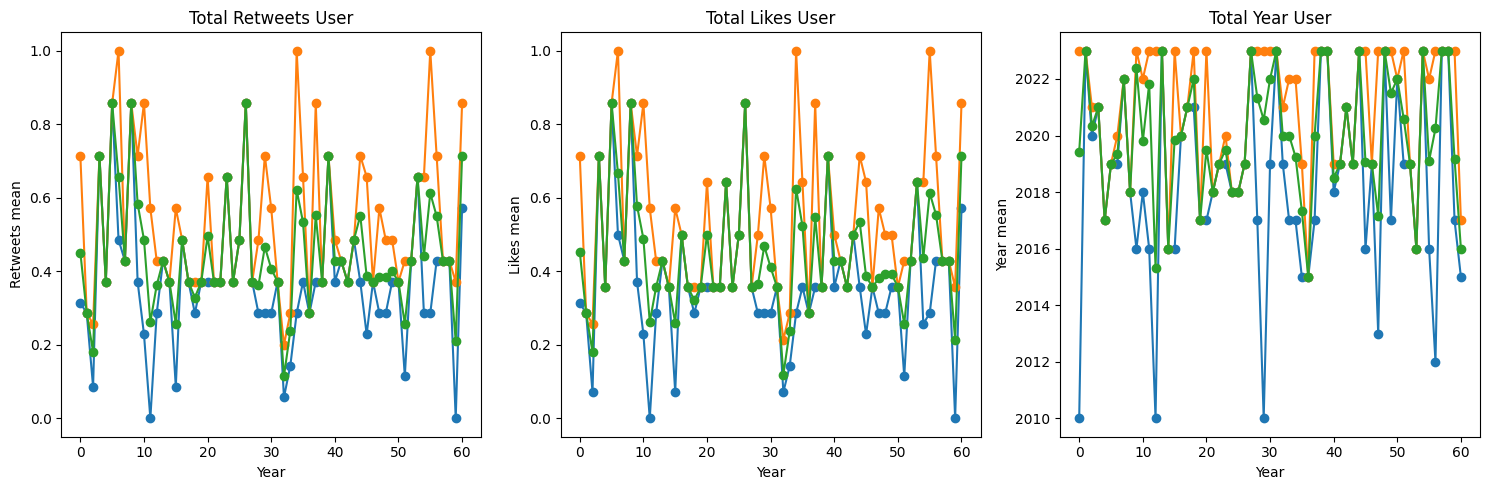

In [ ]:
vis_df = df.groupby(by=["Country","Platform"]).agg({
    "Retweets":["min","max","mean"],
    "Likes":["min","max","mean"],
    "Year":["min","max","mean"],
})
import matplotlib.pyplot as plt
vis_platform=vis_df.loc[vis_df.index.get_level_values(1) == "Twitter"]
vis_platform = vis_platform.reset_index()

variable = ["Retweets", "Likes", "Year"]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(variable):
    axes[i].plot(vis_platform.index, vis_platform[var], marker='o')
    axes[i].set_title(f'Total {var} Twitter User')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(f'{var} mean')

plt.tight_layout()
plt.show()


HISTOGRAM FOR TWITTER

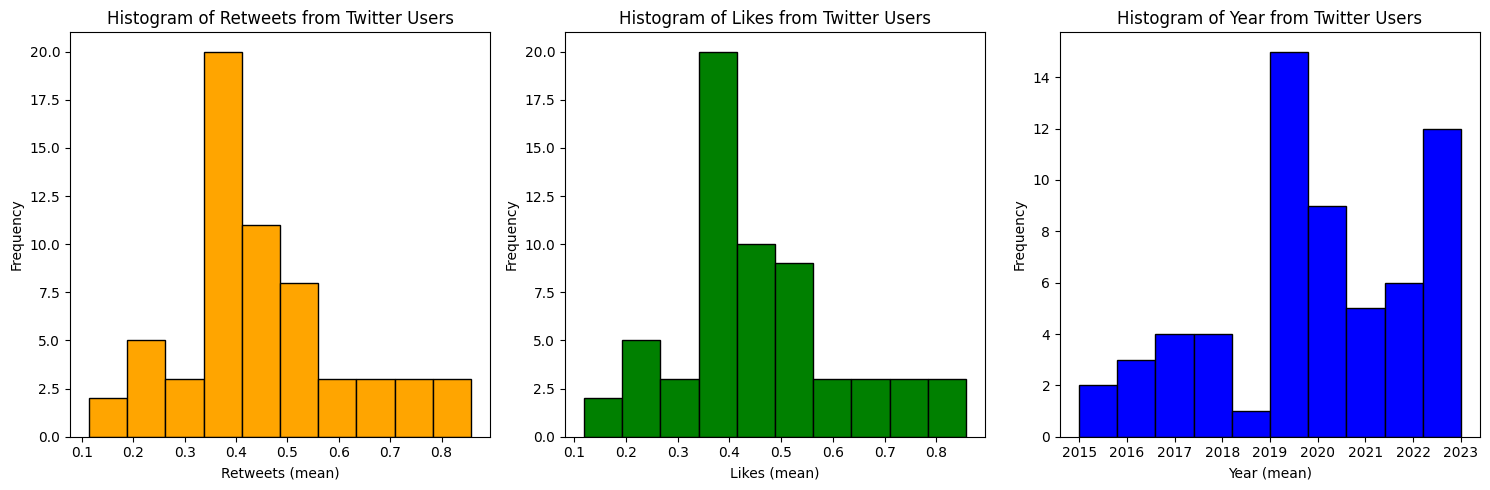

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
hist_colors = ['orange', 'green', 'blue']
for i, var in enumerate(variable):
    axes[i].hist(vis_platform[(var, 'mean')], bins=10, color=hist_colors[i], edgecolor='black')
    axes[i].set_title(f'Histogram of {var} from Twitter Users')
    axes[i].set_xlabel(f'{var} (mean)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

BOXPLOT FOR TWITTER 

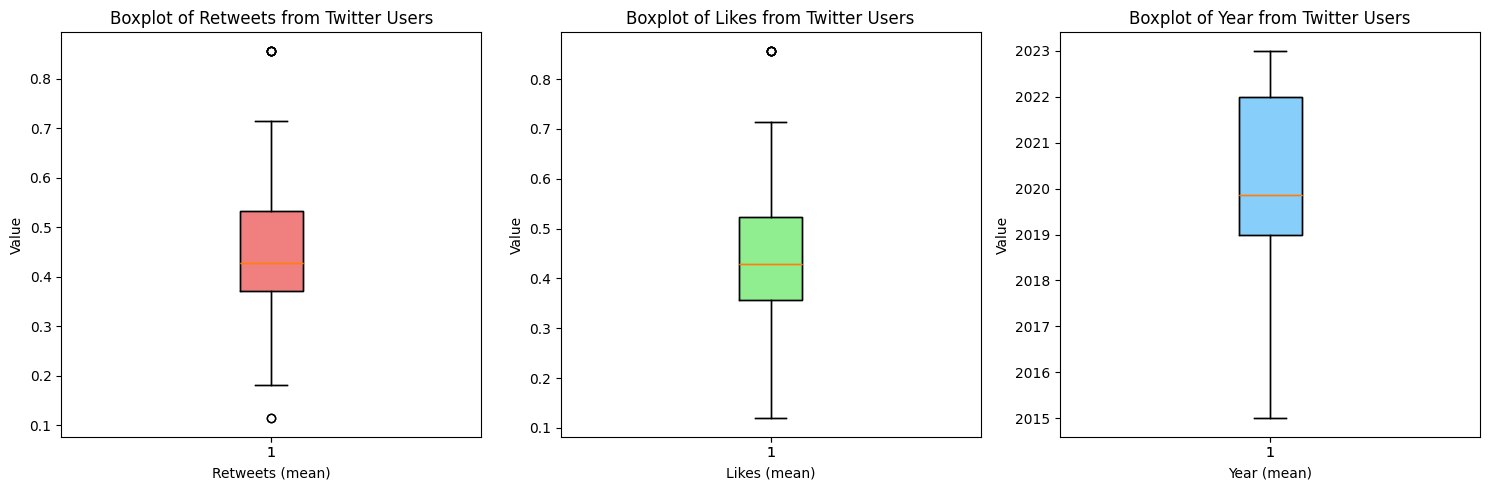

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(variable):
    box_colors = ['lightcoral', 'lightgreen', 'lightskyblue']
    box = axes[i].boxplot(vis_platform[(var, 'mean')], patch_artist=True)
    for patch in box['boxes']:
        patch.set_facecolor(box_colors[i])
    axes[i].boxplot(vis_platform[(var, 'mean')])
    axes[i].set_title(f'Boxplot of {var} from Twitter Users')
    axes[i].set_xlabel(f'{var} (mean)')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

SCATTER PLOT FOR TWITTER

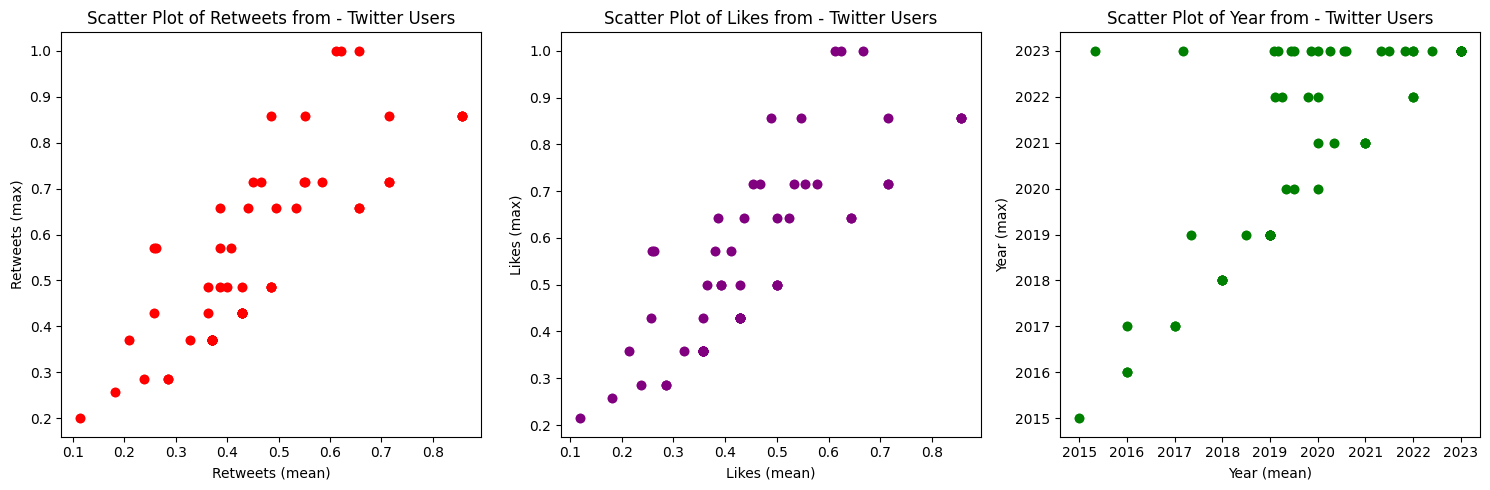

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(variable):
    scatter_colors = ['red', 'purple', 'green']  
    axes[i].scatter(vis_platform[(var, 'mean')], vis_platform[(var, 'max')], alpha=0.7, color=scatter_colors[i])
    axes[i].plot(vis_platform[(var, 'mean')], vis_platform[(var, 'max')], marker='o', linestyle='None', color=scatter_colors[i])
    axes[i].set_title(f'Scatter Plot of {var} from - Twitter Users')
    axes[i].set_xlabel(f'{var} (mean)')
    axes[i].set_ylabel(f'{var} (max)')

plt.tight_layout()
plt.show()

VISUALIVATION OF FACEBOOK 

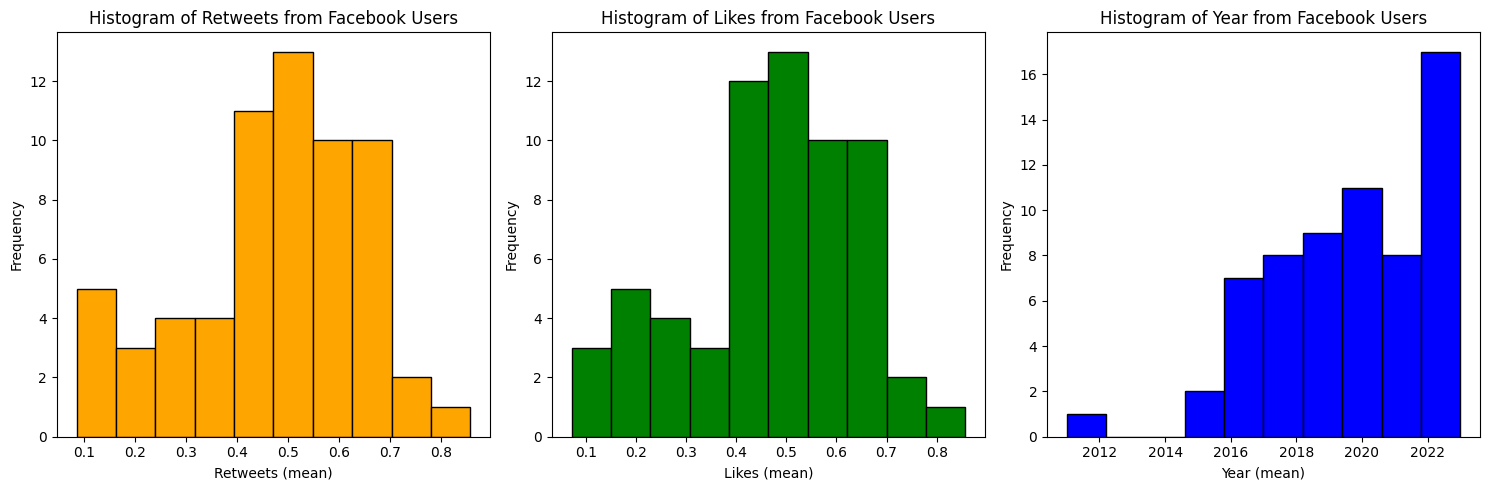

In [48]:
# Histogram for Facebook
vis_facebook = vis_df.loc[vis_df.index.get_level_values(1) == "Facebook"].reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
hist_colors = ['orange', 'green', 'blue']
for i, var in enumerate(variable):
    axes[i].hist(vis_facebook[(var, 'mean')], bins=10, color=hist_colors[i], edgecolor='black')
    axes[i].set_title(f'Histogram of {var} from Facebook Users')
    axes[i].set_xlabel(f'{var} (mean)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

BOXPLOT FOR FACEBOOK

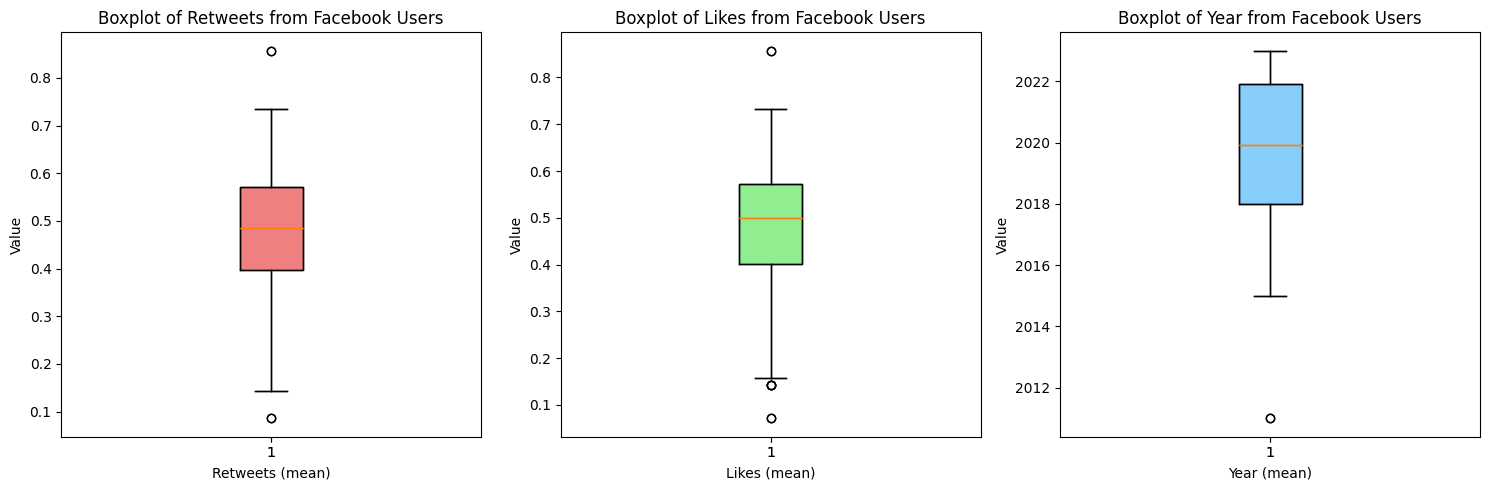

In [49]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, var in enumerate(variable):
    box_colors = ['lightcoral', 'lightgreen', 'lightskyblue']
    box = axes[i].boxplot(vis_facebook[(var, 'mean')], patch_artist=True)
    for patch in box['boxes']:
        patch.set_facecolor(box_colors[i])
    axes[i].boxplot(vis_facebook[(var, 'mean')])
    axes[i].set_title(f'Boxplot of {var} from Facebook Users')
    axes[i].set_xlabel(f'{var} (mean)')
    axes[i].set_ylabel('Value') 
plt.tight_layout()
plt.show()    

SCATTER PLOT OF FACEBOOK

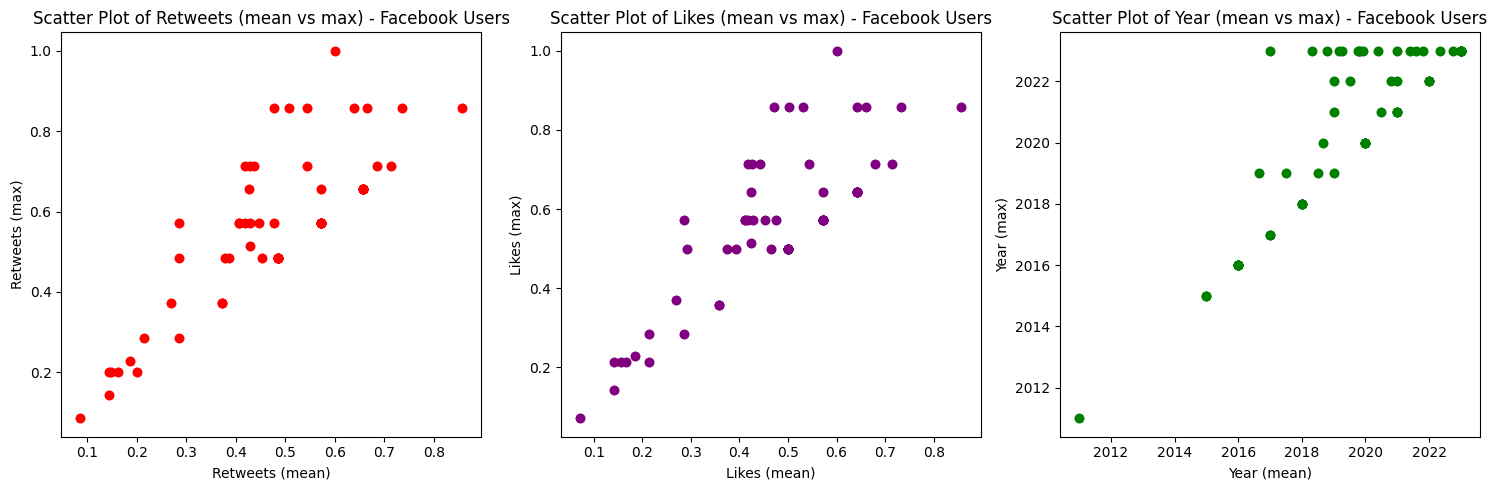

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(variable):
    scatter_colors = ['red', 'purple', 'green']
    axes[i].scatter(vis_facebook[(var, 'mean')], vis_facebook[(var, 'max')], alpha=0.7, color=scatter_colors[i])
    axes[i].plot(vis_facebook[(var, 'mean')], vis_facebook[(var, 'max')], marker='o', linestyle='None', color=scatter_colors[i])
    axes[i].set_title(f'Scatter Plot of {var} (mean vs max) - Facebook Users')
    axes[i].set_xlabel(f'{var} (mean)')
    axes[i].set_ylabel(f'{var} (max)')

plt.tight_layout()
plt.show()

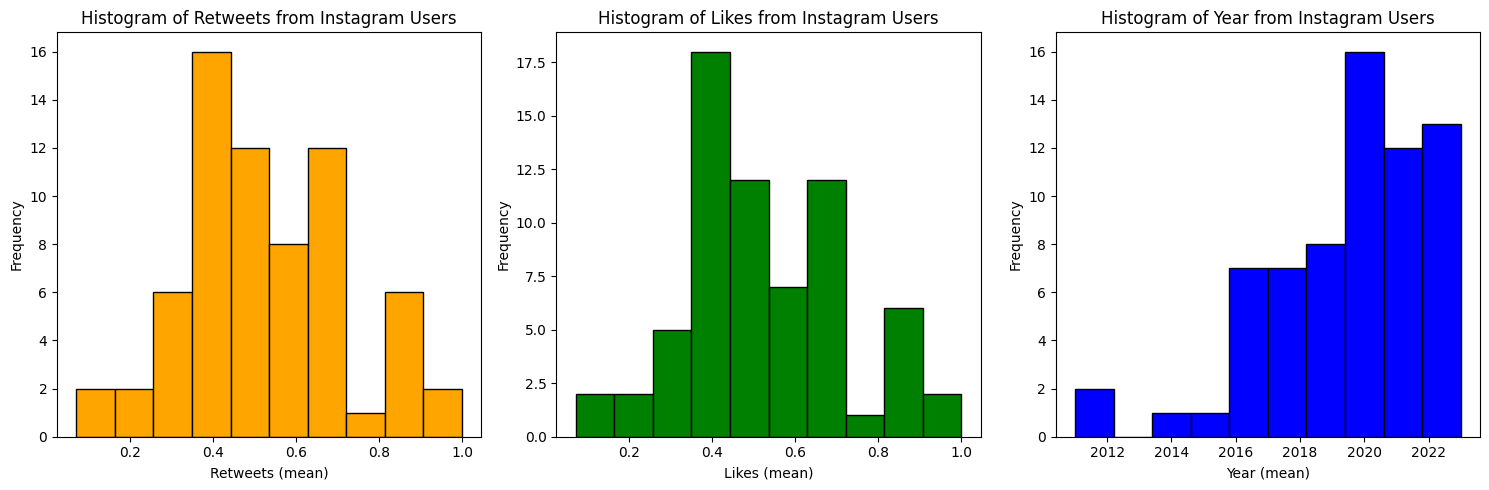

In [53]:
# Histogram for Instagram
vis_instagram = vis_df.loc[vis_df.index.get_level_values(1) == "Instagram"].reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
hist_colors = ['orange', 'green', 'blue']
for i, var in enumerate(variable):
    axes[i].hist(vis_instagram[(var, 'mean')], bins=10, color=hist_colors[i], edgecolor='black')
    axes[i].set_title(f'Histogram of {var} from Instagram Users')
    axes[i].set_xlabel(f'{var} (mean)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

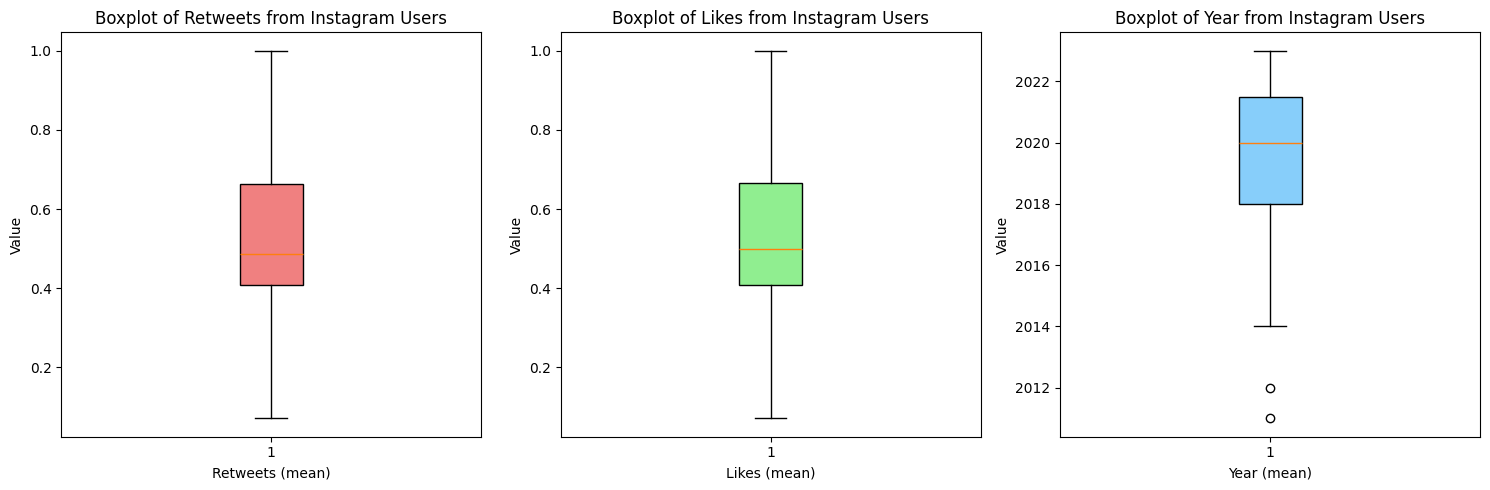

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, var in enumerate(variable):
    box = axes[i].boxplot(vis_instagram[(var, 'mean')], patch_artist=True)
    for patch in box['boxes']:
        patch.set_facecolor(box_colors[i])
    axes[i].set_title(f'Boxplot of {var} from Instagram Users')
    axes[i].set_xlabel(f'{var} (mean)')
    axes[i].set_ylabel('Value')
plt.tight_layout()
plt.show()

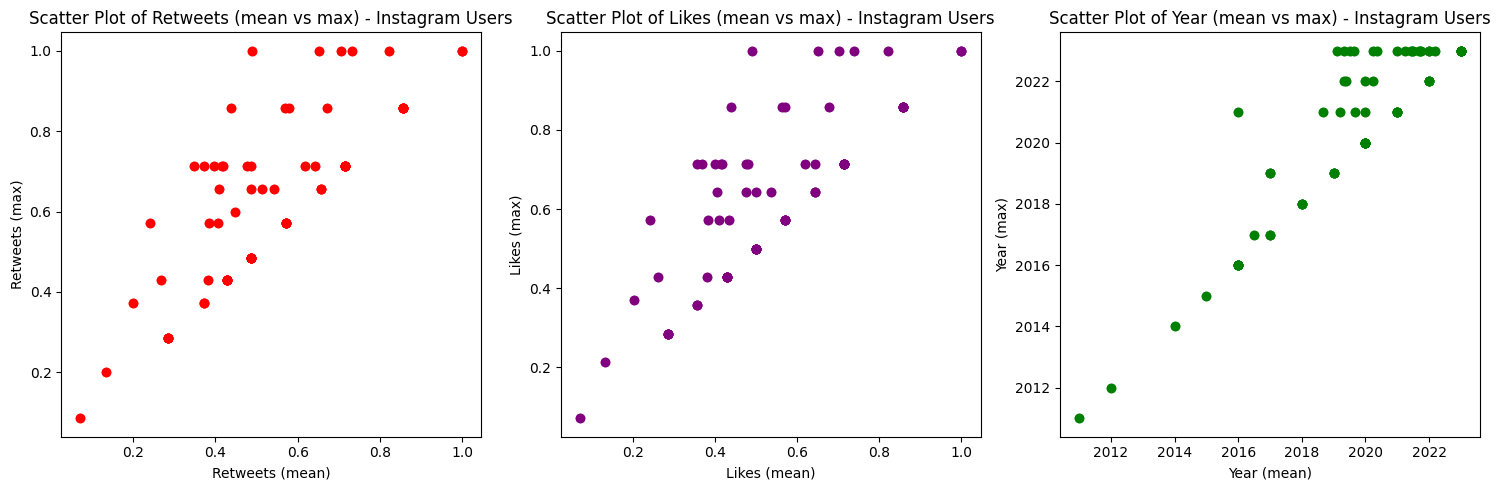

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(variable):
    axes[i].scatter(vis_instagram[(var, 'mean')], vis_instagram[(var, 'max')], alpha=0.7, color=scatter_colors[i])
    axes[i].plot(vis_instagram[(var, 'mean')], vis_instagram[(var, 'max')], marker='o', linestyle='None', color=scatter_colors[i])
    axes[i].set_title(f'Scatter Plot of {var} (mean vs max) - Instagram Users')
    axes[i].set_xlabel(f'{var} (mean)')
    axes[i].set_ylabel(f'{var} (max)')

plt.tight_layout()
plt.show()

In [56]:
# Insights from EDA and Visualizations across Twitter, Facebook, and Instagram

insights = """
1. **Engagement Trends by Platform**:
    - Twitter, Facebook, and Instagram show distinct patterns in Retweets, Likes, and activity over the years.
    - Instagram generally exhibits higher mean Likes and Retweets compared to Facebook, with Twitter showing more variability across countries and years.

2. **Yearly Evolution**:
    - All platforms demonstrate an increase in engagement metrics (Retweets, Likes) in recent years, indicating growing user activity and platform adoption.
    - The mean 'Year' values for posts are higher for Instagram and Twitter, suggesting these platforms have more recent active user bases.

3. **Distribution Patterns**:
    - Histograms reveal that most users on all platforms have moderate engagement, with a few outliers achieving very high Likes or Retweets.
    - Facebook's engagement distribution is more concentrated, while Instagram and Twitter have a wider spread, especially in Likes.

4. **Outliers and Variability**:
    - Boxplots highlight the presence of outliers, especially on Instagram, where some posts achieve exceptionally high engagement.
    - Twitter's engagement metrics also show significant variability, possibly due to viral content or trending topics.

5. **Correlation between Metrics**:
    - Scatter plots indicate a positive correlation between mean and max values of Retweets and Likes for all platforms.
    - Instagram shows a stronger linear relationship, suggesting that users who consistently receive high average engagement also tend to have posts with the highest peaks.

6. **Country and Platform Differences**:
    - Grouped aggregations show that certain countries have higher engagement on specific platforms, reflecting regional preferences and platform popularity.

**Conclusion**:  
The EDA demonstrates that Instagram leads in average engagement, Twitter is highly variable and responsive to trends, and Facebook maintains steady but lower engagement. All platforms have seen increased activity in recent years, with notable differences in user behavior and engagement distribution across platforms and countries.
"""

print(insights)


1. **Engagement Trends by Platform**:
    - Twitter, Facebook, and Instagram show distinct patterns in Retweets, Likes, and activity over the years.
    - Instagram generally exhibits higher mean Likes and Retweets compared to Facebook, with Twitter showing more variability across countries and years.

2. **Yearly Evolution**:
    - All platforms demonstrate an increase in engagement metrics (Retweets, Likes) in recent years, indicating growing user activity and platform adoption.
    - The mean 'Year' values for posts are higher for Instagram and Twitter, suggesting these platforms have more recent active user bases.

3. **Distribution Patterns**:
    - Histograms reveal that most users on all platforms have moderate engagement, with a few outliers achieving very high Likes or Retweets.
    - Facebook's engagement distribution is more concentrated, while Instagram and Twitter have a wider spread, especially in Likes.

4. **Outliers and Variability**:
    - Boxplots highlight the pres